### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [37]:
#Calcular ingresos totales por tienda

ingresos_tienda1 = tienda['Precio'].sum()
ingresos_tienda2 = tienda2['Precio'].sum()
ingresos_tienda3 = tienda3['Precio'].sum()
ingresos_tienda4 = tienda4['Precio'].sum()

In [3]:
def formatear(valor):
  return f"{int(valor):,}".replace(",",".")

In [4]:
#Mostrar resultados

print(f"Ingreso total tienda 1: {formatear(ingresos_tienda1)}")
print(f"Ingreso total tienda 2: {formatear(ingresos_tienda2)}")
print(f"Ingreso total tienda 3: {formatear(ingresos_tienda3)}")
print(f"Ingreso total tienda 4: {formatear(ingresos_tienda4)}")

Ingreso total tienda 1: 1.150.880.400
Ingreso total tienda 2: 1.116.343.500
Ingreso total tienda 3: 1.098.019.600
Ingreso total tienda 4: 1.038.375.700


# 2. Ventas por categoría

In [10]:
ventas_categoria_tienda = tienda['Categoría del Producto'].value_counts()
ventas_categoria_tienda2 = tienda2['Categoría del Producto'].value_counts()
ventas_categoria_tienda3 = tienda3['Categoría del Producto'].value_counts()
ventas_categoria_tienda4 = tienda4['Categoría del Producto'].value_counts()

In [12]:
print("\nVentas por categoría - Tienda 1:")
for categoria, cantidad in ventas_categoria_tienda.items():
  print(f"{categoria}: {cantidad}")

print("\nVentas por categoría - Tienda 2:")
for categoria, cantidad in ventas_categoria_tienda2.items():
  print(f"{categoria}: {cantidad}")

print("\nVentas por categoría - Tienda 3:")
for categoria, cantidad in ventas_categoria_tienda3.items():
  print(f"{categoria}: {cantidad}")

print("\nVentas por categoría - Tienda 4:")
for categoria, cantidad in ventas_categoria_tienda4.items():
  print(f"{categoria}: {cantidad}")



Ventas por categoría - Tienda 1:
Muebles: 465
Electrónicos: 448
Juguetes: 324
Electrodomésticos: 312
Deportes y diversión: 284
Instrumentos musicales: 182
Libros: 173
Artículos para el hogar: 171

Ventas por categoría - Tienda 2:
Muebles: 442
Electrónicos: 422
Juguetes: 313
Electrodomésticos: 305
Deportes y diversión: 275
Instrumentos musicales: 224
Libros: 197
Artículos para el hogar: 181

Ventas por categoría - Tienda 3:
Muebles: 499
Electrónicos: 451
Juguetes: 315
Electrodomésticos: 278
Deportes y diversión: 277
Libros: 185
Instrumentos musicales: 177
Artículos para el hogar: 177

Ventas por categoría - Tienda 4:
Muebles: 480
Electrónicos: 451
Juguetes: 338
Deportes y diversión: 277
Electrodomésticos: 254
Artículos para el hogar: 201
Libros: 187
Instrumentos musicales: 170


# 3. Calificación promedio de la tienda


In [13]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']


In [53]:
calificaciones_promedio = {}
for nombre, df in zip(nombres, tiendas):
  promedio = df['Calificación'].mean()
  calificaciones_promedio[nombre] = promedio
  print(f"{nombre}: {promedio:.2f}")

Tienda 1: 4.00
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [15]:
for nombre, df in zip(nombres, tiendas):
  ventas = df['Producto'].value_counts()

  producto_mas_vendido = ventas.idxmax()
  producto_menos_vendido = ventas.idxmin()

  print(f"{nombre}")
  print(f"Más vendido: {producto_mas_vendido} ({ventas.max()} ventas)")
  print(f"Menos vendido: {producto_menos_vendido} ({ventas.min()} ventas)\n")

Tienda 1
Más vendido: Microondas (60 ventas)
Menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2
Más vendido: Iniciando en programación (65 ventas)
Menos vendido: Juego de mesa (32 ventas)

Tienda 3
Más vendido: Kit de bancas (57 ventas)
Menos vendido: Bloques de construcción (35 ventas)

Tienda 4
Más vendido: Cama box (62 ventas)
Menos vendido: Guitarra eléctrica (33 ventas)



# 5. Envío promedio por tienda

In [16]:
promedio_envio_tienda = tienda['Costo de envío'].mean()
promedio_envio_tienda2 = tienda2['Costo de envío'].mean()
promedio_envio_tienda3 = tienda3['Costo de envío'].mean()
promedio_envio_tienda4 = tienda4['Costo de envío'].mean()

In [17]:
print(f"Costo de envío promedio - Tienda 1: {formatear(promedio_envio_tienda)}")
print(f"Costo de envío promedio - Tienda 2: {formatear(promedio_envio_tienda)}")
print(f"Costo de envío promedio - Tienda 3: {formatear(promedio_envio_tienda3)}")
print(f"Costo de envío promedio - Tienda 4: {formatear(promedio_envio_tienda4)}")


Costo de envío promedio - Tienda 1: 26.018
Costo de envío promedio - Tienda 2: 26.018
Costo de envío promedio - Tienda 3: 24.805
Costo de envío promedio - Tienda 4: 23.459


In [19]:
import matplotlib

import matplotlib.pyplot as plt


# 6. Gráficos

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [28]:
ingresos = {'Tienda 1': 1150880400, 'Tienda 2': 1116343500, 'Tienda 3': 1098019600, 'Tienda 4': 1038375700}

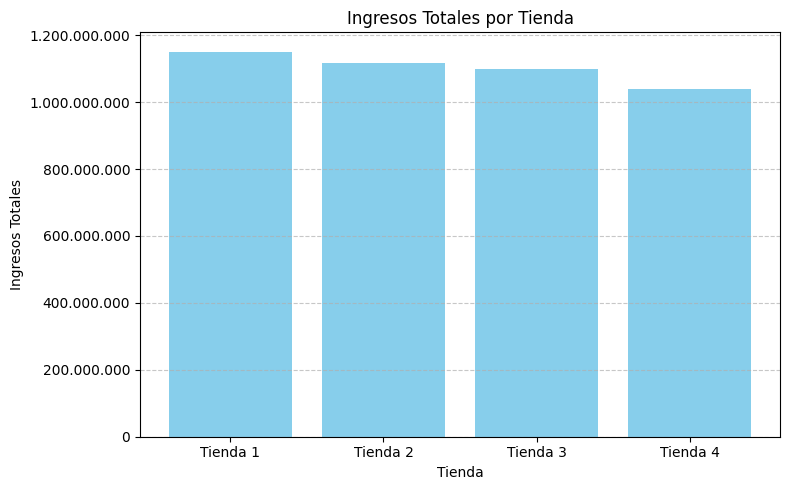

In [43]:
plt.figure(figsize=(8,5))
plt.bar(ingresos.keys(), ingresos.values(), color='skyblue')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

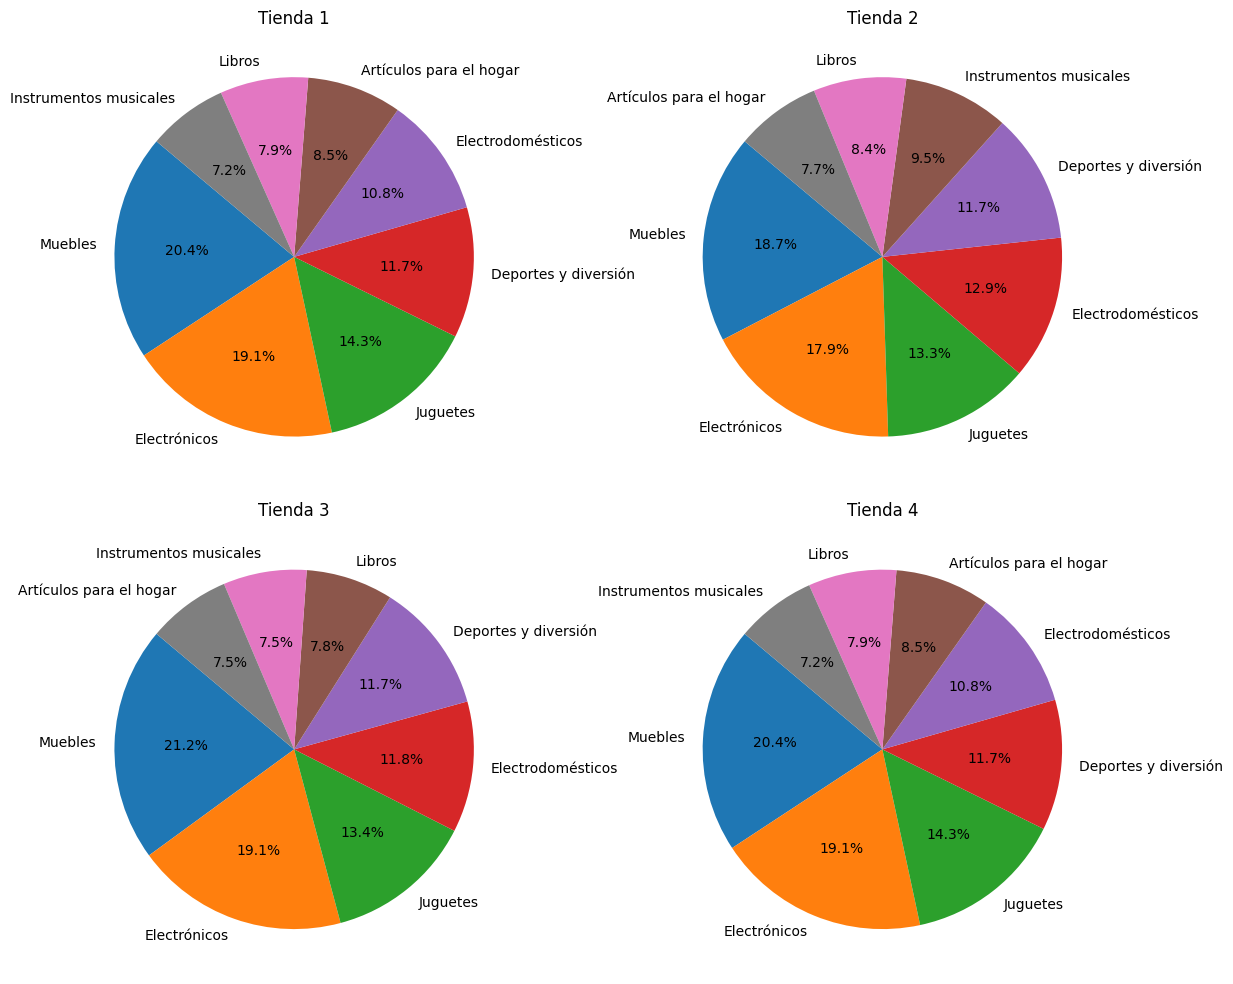

In [57]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

tiendas = [tienda, tienda2, tienda3, tienda4]
titulos = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for i, (tienda, titulo) in enumerate(zip(tiendas, titulos)):
    categorias = tienda['Categoría del Producto'].value_counts()
    fila = i // 2
    columna = i % 2
    axs[fila, columna].pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=140)
    axs[fila, columna].set_title(titulo)

plt.tight_layout()
plt.show()

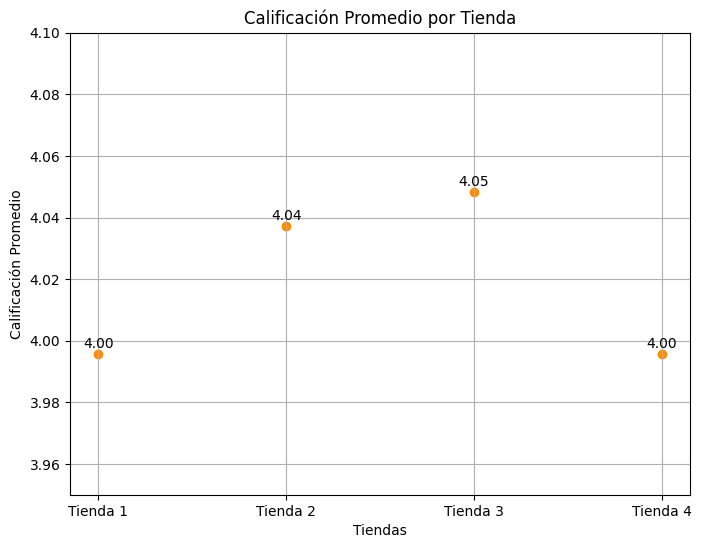

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(tiendas, calificaciones, color='darkorange')
for i, valor in enumerate(calificaciones):
    plt.text(tiendas[i], valor + 0.002, f"{valor:.2f}", ha='center')
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.ylim(3.95, 4.10)
plt.grid(True)
plt.show()

#7. Informe final

##Introducción
El propósito de este análisis es ayudar al Sr. Juan a decidir qué tienda de su cadena Alura Store debería vender para comenzar un nuevo emprendimiento. Para ello, se analizaron múltiples indicadores clave de rendimiento: ingresos totales por tienda, ventas por categoría, calificaciones promedio de clientes, productos con mayor y menor rotación, y el costo promedio de envío. Este informe resume los hallazgos y presenta una recomendación clara sobre cuál tienda es menos eficiente y, por lo tanto, la mejor opción para vender.

##Análisis Comparativo

###Ingresos Totales

Tienda 1: 1.150.880.400 (mayor ingreso)

Tienda 2: 1.116.343.500

Tienda 3: 1.098.019.600

Tienda 4: 1.038.375.700 (menor ingreso)

La Tienda 4 genera los menores ingresos, lo que ya indica una desventaja en términos de rentabilidad global.

###Ventas por categoría

Aunque las categorías más vendidas son similares en todas las tiendas (con Muebles y Electrónicos como líderes), la Tienda 4 tiene niveles más bajos en Electrodomésticos y una proporción ligeramente menor de productos clave en comparación con las otras tiendas.

###Calificación Promedio

Tienda 3: 4.05 ⭐

Tienda 2: 4.04

Tienda 1: 4.00

Tienda 4: 4.00 🔻

La Tienda 4, junto con la Tienda 1, tiene la calificación más baja de clientes, lo cual podría reflejar problemas en atención, experiencia o calidad.

###Productos más y menos vendidos

Aunque Tienda 4 tiene uno de los productos más vendidos con buen desempeño, también muestra poca rotación en ciertas categorías como instrumentos musicales, lo cual podría indicar problemas de stock o interés del público.

###Costo promedio por envío

Tienda 1: 26.018

Tienda 2: 26.018

Tienda 3: 24.805

Tienda 4: 23.459 ✅


El único punto fuerte de la Tienda 4 es su bajo costo logístico, lo cual puede mejorar márgenes, pero no compensa las demás debilidades observadas.

###Conclusión y recomendación

Tras el análisis integral de desempeño comercial, eficiencia operativa y satisfacción del cliente, se concluye que la Tienda 4 es la menos eficiente dentro de la cadena Alura Store.

Las razones son:

🔻 Menor ingreso total de todas las tiendas.

🔻 Calificación promedio más baja (empatada con la Tienda 1).

🔻 Menor fuerza en categorías clave, como electrodomésticos.

⚠️ Aunque tiene el costo de envío más bajo, este aspecto no compensa sus debilidades generales.

Por lo tanto, se recomienda al Sr. Juan que venda la Tienda 4 y enfoque sus recursos en potenciar las otras tiendas más eficientes o iniciar su nuevo emprendimiento con mayor capital y menor riesgo operativo.
